In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
nltk.download('vader_lexicon')
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.cluster import KMeans
from operator import itemgetter
import random
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/menis/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
data = pd.read_json("preprocessingDoneRight.json")
data = data[data["is_retweet"] == False]
data.drop(["is_retweet","favorite_count","retweet_count","in_reply_to_user_id_str"],axis=1,inplace=True)

In [12]:
print(data["year"].unique())
data

[2009 2010 2012 2013 2014 2015 2011 2016 2017 2018 2019]


,text,month,year,hour,week_year,date,modded_text,modded1,noTags_punct,modded1_stemmed,vaderScore
0,Be sure to tune in and watch Donald Trump on L...,5,2009,18,19,2009-05-04,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night david ...,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night...,0.5255
1,Donald Trump will be appearing on The View tom...,5,2009,1,19,2009-05-05,donald trump will be appearing on the view tom...,donald trump appearing view tomorrow morning d...,donald trump will be appearing on the view tom...,donald trump appear view tomorrow morn ...,0.7712
10,"""Don’t be afraid of being unique - it's like b...",5,2009,15,20,2009-05-17,"""don’t be afraid of being unique - it's like b...",afraid unique like afraid best self donald j t...,don t be afraid of being unique its like bein...,afraid uniqu like afraid best self dona...,0.7717
100,The latest update on Bret Michaels is that he'...,5,2010,16,20,2010-05-20,the latest update on bret michaels is that he'...,latest update bret michaels hes making every e...,the latest update on bret michaels is that hes...,latest updat bret michael he make everi...,0.0000
1000,China is driving the price of gold up in order...,1,2012,19,1,2012-01-05,china is driving the price of gold up in order...,china driving price gold order ease pressure i...,china is driving the price of gold up in order...,china drive price gold order eas pressu...,0.0772
10000,"""@KevinMartinRI: I'm a big fan of the new @rea...",8,2013,3,31,2013-08-02,"""@kevinmartinri: i'm a big fan of the new @rea...",kevinmartinri im big fan new realdonaldtrump t...,kevinmartinri im a big fan of the new realdona...,kevinmartinri im big fan new realdonaldt...,0.8622
10001,"""@bobbassman: @realDonaldTrump @anthonyolgin l...",8,2013,3,31,2013-08-02,"""@bobbassman: @realdonaldtrump @anthonyolgin l...",bobbassman realdonaldtrump like bush killed ki...,bobbassman realdonaldtrump like when bush ki...,bobbassman realdonaldtrump like bush kill...,-0.9334
10002,"""@robocosby: help me @realDonaldTrump I am dep...",8,2013,3,31,2013-08-02,"""@robocosby: help me @realdonaldtrump i am dep...",robocosby help realdonaldtrump depressed keep ...,robocosby help me realdonaldtrump i am depress...,robocosbi help realdonaldtrump depress ke...,0.4574
10003,Isn't it sad the way Putin is toying with Obam...,8,2013,3,31,2013-08-02,isn't it sad the way putin is toying with obam...,isnt sad way putin toying obama regarding snow...,isnt it sad the way putin is toying with obama...,isnt sad way putin toy obama regard sn...,-0.7929
10004,"""@hattakzots: @realDonaldTrump you're one of t...",8,2013,3,31,2013-08-02,"""@hattakzots: @realdonaldtrump you're one of t...",hattakzots realdonaldtrump youre one voices re...,hattakzots realdonaldtrump youre one of the on...,hattakzot realdonaldtrump your one voic ...,0.6145


(array([1306., 2203., 2480., 1776.,  963., 7110., 2676., 5794., 6185.,
        5391.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

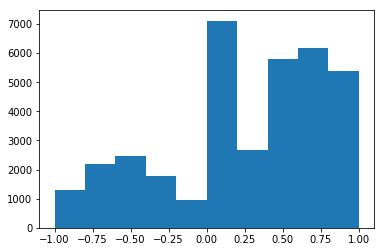

In [11]:
#add sentiment
vader = SentimentIntensityAnalyzer()
text = data["text"].tolist()
scores = list()
positive = list()
negative = list()
neut = list()
for t in text:
    scores.append(vader.polarity_scores(t)['compound'])
    positive.append(vader.polarity_scores(t)['pos'])
    negative.append(vader.polarity_scores(t)['neg'])
    neut.append(vader.polarity_scores(t)['neu'])

data["vaderScore"] = scores
plt.hist(data["vaderScore"],bins=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])

In [19]:
days = []
dates = data["date"].tolist()
for el in dates:
    days.append(el.day)
data["day"] = days
data

,text,month,year,hour,week_year,date,modded_text,modded1,noTags_punct,modded1_stemmed,vaderScore,day
0,Be sure to tune in and watch Donald Trump on L...,5,2009,18,19,2009-05-04,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night david ...,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night...,0.5255,4
1,Donald Trump will be appearing on The View tom...,5,2009,1,19,2009-05-05,donald trump will be appearing on the view tom...,donald trump appearing view tomorrow morning d...,donald trump will be appearing on the view tom...,donald trump appear view tomorrow morn ...,0.7712,5
10,"""Don’t be afraid of being unique - it's like b...",5,2009,15,20,2009-05-17,"""don’t be afraid of being unique - it's like b...",afraid unique like afraid best self donald j t...,don t be afraid of being unique its like bein...,afraid uniqu like afraid best self dona...,0.7717,17
100,The latest update on Bret Michaels is that he'...,5,2010,16,20,2010-05-20,the latest update on bret michaels is that he'...,latest update bret michaels hes making every e...,the latest update on bret michaels is that hes...,latest updat bret michael he make everi...,0.0000,20
1000,China is driving the price of gold up in order...,1,2012,19,1,2012-01-05,china is driving the price of gold up in order...,china driving price gold order ease pressure i...,china is driving the price of gold up in order...,china drive price gold order eas pressu...,0.0772,5
10000,"""@KevinMartinRI: I'm a big fan of the new @rea...",8,2013,3,31,2013-08-02,"""@kevinmartinri: i'm a big fan of the new @rea...",kevinmartinri im big fan new realdonaldtrump t...,kevinmartinri im a big fan of the new realdona...,kevinmartinri im big fan new realdonaldt...,0.8622,2
10001,"""@bobbassman: @realDonaldTrump @anthonyolgin l...",8,2013,3,31,2013-08-02,"""@bobbassman: @realdonaldtrump @anthonyolgin l...",bobbassman realdonaldtrump like bush killed ki...,bobbassman realdonaldtrump like when bush ki...,bobbassman realdonaldtrump like bush kill...,-0.9334,2
10002,"""@robocosby: help me @realDonaldTrump I am dep...",8,2013,3,31,2013-08-02,"""@robocosby: help me @realdonaldtrump i am dep...",robocosby help realdonaldtrump depressed keep ...,robocosby help me realdonaldtrump i am depress...,robocosbi help realdonaldtrump depress ke...,0.4574,2
10003,Isn't it sad the way Putin is toying with Obam...,8,2013,3,31,2013-08-02,isn't it sad the way putin is toying with obam...,isnt sad way putin toying obama regarding snow...,isnt it sad the way putin is toying with obama...,isnt sad way putin toy obama regard sn...,-0.7929,2
10004,"""@hattakzots: @realDonaldTrump you're one of t...",8,2013,3,31,2013-08-02,"""@hattakzots: @realdonaldtrump you're one of t...",hattakzots realdonaldtrump youre one voices re...,hattakzots realdonaldtrump youre one of the on...,hattakzot realdonaldtrump your one voic ...,0.6145,2


In [21]:
print(len(data))
data.corr()

35884


,month,year,hour,week_year,vaderScore,day
month,1.000000,-0.093354,0.028373,0.973961,-0.021107,-0.017886
year,-0.093354,1.000000,-0.139170,-0.093123,0.002642,-0.001464
hour,0.028373,-0.139170,1.000000,0.030357,-0.033789,0.028511
week_year,0.973961,-0.093123,0.030357,1.000000,-0.021755,0.040895
vaderScore,-0.021107,0.002642,-0.033789,-0.021755,1.000000,-0.008346
day,-0.017886,-0.001464,0.028511,0.040895,-0.008346,1.000000


In [22]:
data.drop_duplicates("modded1_stemmed",inplace=True)
len(data)

34450

In [43]:
stemmed_words = pd.Series(' '.join(data['modded1_stemmed']).split()).value_counts()
stemmed_words = stemmed_words[10:]
stemmed_words = stemmed_words[stemmed_words > 5]
stemmed_words

donald            1725
make              1719
countri           1705
obama             1581
time              1576
would             1562
new               1493
america           1485
like              1470
need              1445
run               1442
job               1369
vote              1341
one               1325
love              1284
look              1281
good              1261
big               1243
want              1191
year              1142
work              1115
mani              1067
think             1041
never             1041
watch             1036
today             1024
back               998
see                985
show               956
win                948
                  ... 
gabriel              6
fri                  6
prayformetoo         6
spoiler              6
norfolk              6
50000                6
1200                 6
corey                6
breakdown            6
blip                 6
thankyou             6
indict               6
wipe       

In [44]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

data['m'] = data['modded1_stemmed'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words))
corpus = data["m"].tolist()
print(len(corpus))

corp = []
for string in corpus:
    tokens = tokenizer.tokenize(string)
    corp.append(tokens)

dictionary = corpora.Dictionary(corp)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corp]

34450


In [45]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step):
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    print(coherence_values)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()


[0.2571724934096615, 0.26220517456370157, 0.23299559840904518, 0.26785563344630847, 0.2601372824421733, 0.2895010137656342, 0.25501090935861614, 0.25275123489507495, 0.24298754752967783, 0.27523224189864287, 0.23724345206162883, 0.29032111954311446, 0.26968856237167865, 0.23901637924063468, 0.25249003262939723, 0.24437268866058953, 0.2546573402353199, 0.2355897546623437, 0.24774180537718288, 0.24994261617102603, 0.25267350592243215, 0.25016867304995644, 0.24556425289311593, 0.24219992557444797, 0.24005438987533528, 0.23873788429567583, 0.2577759726299147, 0.257820492268853, 0.2561451741041635, 0.25561356408845937, 0.24978039557531934, 0.2522723639310893, 0.24915178178329406, 0.2531731482673798, 0.2653195060482958, 0.23639511383731182, 0.25133205691397426, 0.2603726980942798, 0.2594032709631177, 0.2531670807197254]


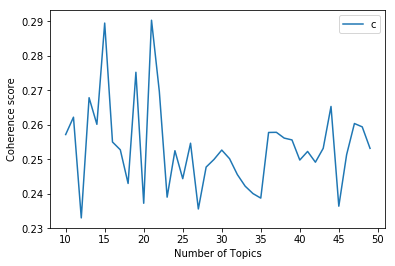

CPU times: user 19min 43s, sys: 13min 5s, total: 32min 49s
Wall time: 3min 54s


In [46]:
%%time
start,stop,step= 10,50,1
plot_graph(corp,start,stop,step)


In [49]:
words = 10
number_of_topics = 15
lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
lsamodel.print_topics(num_topics = -1)

[(0,
  '0.220*"make" + 0.220*"countri" + 0.183*"time" + 0.182*"would" + 0.178*"america" + 0.160*"need" + 0.154*"like" + 0.153*"vote" + 0.149*"obama" + 0.143*"job"'),
 (1,
  '-0.602*"make" + -0.544*"america" + -0.182*"need" + -0.173*"vote" + 0.147*"time" + 0.144*"obama" + 0.122*"like" + 0.116*"would" + -0.115*"run" + 0.106*"look"'),
 (2,
  '-0.445*"vote" + -0.344*"run" + 0.323*"make" + -0.300*"need" + -0.267*"countri" + -0.260*"would" + 0.227*"new" + 0.190*"america" + 0.148*"big" + 0.131*"look"'),
 (3,
  '0.450*"time" + -0.361*"donald" + -0.331*"like" + -0.317*"look" + -0.268*"would" + 0.208*"border" + 0.193*"new" + -0.181*"run" + 0.132*"year" + -0.121*"good"'),
 (4,
  '-0.665*"obama" + 0.380*"time" + 0.216*"run" + 0.203*"vote" + 0.167*"donald" + 0.157*"new" + -0.149*"want" + 0.137*"look" + 0.106*"like" + 0.103*"love"'),
 (5,
  '-0.602*"countri" + 0.597*"vote" + -0.209*"need" + 0.129*"obama" + -0.122*"run" + 0.119*"republican" + -0.092*"trade" + 0.086*"senat" + -0.083*"back" + -0.075*"p